In [58]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [59]:
pd.options.display.float_format = '{:.2f}'.format

In [60]:
dfs = []
for year in tqdm([2018,2019]):
    dfs.append(pd.read_csv('/data/raw_data_history_only/LBdata_'+str(year)+'.csv'))
data = pd.concat(dfs)

  0%|          | 0/2 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (21,27,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
100%|██████████| 2/2 [00:58<00:00, 29.17s/it]


In [61]:
print(data.shape)
data.head()

(10074642, 36)


,Unnamed: 0,Unnamed: 0.1,employee_id,employeeName,homeSubLos2,homeSubLos2Name,hostSubLos2,hostSubLos2Name,BusinessUnit,productCode,...,productSubLosDescription,IndustrySector,Industry,ChargedHours,doc_Date,hireDate,wbsElementId,weekday,weekofyear,year
0,0,0,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,6.00,2018-11-09T00:00:00.000,2002-06-17T00:00:00.000,80058180001,4,45,2018
1,1,1,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,5.00,2018-08-14T00:00:00.000,2002-06-17T00:00:00.000,80058180001,1,33,2018
2,2,2,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,2.00,2018-01-05T00:00:00.000,2002-06-17T00:00:00.000,80058180001,4,1,2018
3,3,3,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,8.00,2018-06-26T00:00:00.000,2002-06-17T00:00:00.000,80058180001,1,26,2018
4,4,4,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,5.00,2018-09-27T00:00:00.000,2002-06-17T00:00:00.000,80058180001,3,39,2018


### What should we do with this?

In [62]:
data.dropna(subset=['productCode'],inplace=True)

### Remove negative hours

In [63]:
def remove_neg_hours(df):
    print("Initial shape:")
    print(df.shape)
    nodup_data = df.copy()
    neg_hours = nodup_data[nodup_data['ChargedHours']<0][['employee_id', 'ChargedHours', 'wbsElementId', 'doc_Date']]
    neg_hours2 = neg_hours.copy()
    neg_hours2['ChargedHours'] = neg_hours2.apply(lambda row: -row['ChargedHours'], axis=1)
    nhcheck = pd.merge(nodup_data,neg_hours2,on=['employee_id', 'ChargedHours', 'wbsElementId', 'doc_Date'], how='inner', right_index = True)[['employee_id', 'ChargedHours', 'wbsElementId', 'doc_Date']]
    entries_to_remove = nhcheck[~nhcheck.duplicated()]
    nodup_data.drop(list(entries_to_remove.index), inplace=True)
    neg_hours = nodup_data[nodup_data['ChargedHours']<=0][['employee_id', 'ChargedHours', 'wbsElementId', 'doc_Date']]
    nodup_data.drop(list(neg_hours.index), inplace=True)
    print("Final shape:")
    print(nodup_data.shape)
    display(nodup_data.head())
    return nodup_data

In [64]:
data = remove_neg_hours(data)

Initial shape:
(9551613, 36)
Final shape:
(5133974, 36)


,Unnamed: 0,Unnamed: 0.1,employee_id,employeeName,homeSubLos2,homeSubLos2Name,hostSubLos2,hostSubLos2Name,BusinessUnit,productCode,...,productSubLosDescription,IndustrySector,Industry,ChargedHours,doc_Date,hireDate,wbsElementId,weekday,weekofyear,year
0,0,0,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,6.00,2018-11-09T00:00:00.000,2002-06-17T00:00:00.000,80058180001,4,45,2018
1,1,1,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,5.00,2018-08-14T00:00:00.000,2002-06-17T00:00:00.000,80058180001,1,33,2018
2,2,2,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,2.00,2018-01-05T00:00:00.000,2002-06-17T00:00:00.000,80058180001,4,1,2018
3,3,3,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,8.00,2018-06-26T00:00:00.000,2002-06-17T00:00:00.000,80058180001,1,26,2018
4,4,4,300155895,"Mayer, Jared A",USOU128,East,USOU128,East,NaN,US450,...,General Consulting,NaN,NaN,5.00,2018-09-27T00:00:00.000,2002-06-17T00:00:00.000,80058180001,3,39,2018


In [ ]:
agg_data = nodup_data.groupby([
    #'employee_id', 
    #'employeeName', 
    #'homeSubLos2',
    #'homeSubLos2Name', 
    #'hostSubLos2', 
    #'hostSubLos2Name', 
    'BusinessUnit',
    'productCode', 
    #'productCodeDescription', 
    'homeSubLos4',
    'homeSubLos4Name', 
    'hostSubLos4', 
    'hostSubLos4Name', 
    #'homeSubLos5',
    #'homeSubLos5Name', 
    #'hostSubLos5', 
    #'hostSubLos5Name',
    #'EngagemenetPartnerName', # MAP TO NAMES AFTER THE MERGE
    'Engagement_Partner_Id',
    'contracting_firm_client_id', 
    #'ContractingFirmClientName', #MAP TO NAMES AFTER THE MERGE
    'localGrade', 
    #'localGradeDescription',
    #'productSubLos', 
    #'productSubLosDescription',
    'IndustrySector', 
    'Industry', 
    #'hireDate',
    ##'wbsElementId', 
    'weekofyear',
    ###'month',
    'year']).agg({'ChargedHours':'sum'})

### Complete remaining steps

In [12]:
agg_data.columns

Index(['BusinessUnit', 'productCode', 'homeSubLos4', 'homeSubLos4Name',
       'hostSubLos4', 'hostSubLos4Name', 'Engagement_Partner_Id',
       'contracting_firm_client_id', 'localGrade', 'IndustrySector',
       'Industry', 'wbsElementId', 'weekofyear', 'year', 'ChargedHours',
       'wbs_size', 'gradeDesc', 'bucket', 'weekofproj', 'total_hours',
       'compliance'],
      dtype='object')

In [65]:
agg_data = pd.read_csv('/data/train_data/agg_data_fy19_compliance.csv')

In [66]:
agg_data.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1'], axis=1, inplace=True)
print(agg_data.shape)
agg_data.head()

(887632, 21)


,BusinessUnit,productCode,homeSubLos4,homeSubLos4Name,hostSubLos4,hostSubLos4Name,Engagement_Partner_Id,contracting_firm_client_id,localGrade,IndustrySector,...,wbsElementId,weekofyear,year,ChargedHours,wbs_size,gradeDesc,bucket,weekofproj,total_hours,compliance
0,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300003669,26209,5,Asset and Wealth Management,...,1163215001,8,2019,3.00,small,Manager,Manager and Above,31,5.00,1
1,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,1255898001,39,2018,3.00,xlarge,Manager,Manager and Above,11,330.00,1
2,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,1255898001,42,2018,2.00,xlarge,Manager,Manager and Above,14,330.00,1
3,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,1255898001,43,2018,2.00,xlarge,Manager,Manager and Above,15,330.00,1
4,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034701,12637,5,Asset and Wealth Management,...,1363380001,1,2019,12.00,xlarge,Manager,Manager and Above,0,1304.00,1


### Removing projects with less than 9 hours

In [67]:
hours_threshold = 20.0

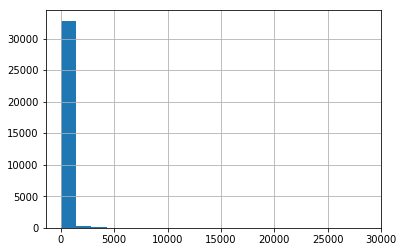

In [68]:
project_weeks = agg_data.groupby([ 
                    'wbsElementId']).agg({'total_hours':'max'})
project_weeks.reset_index(inplace=True)
project_weeks.total_hours.hist(bins=20)

In [69]:
agg_data = agg_data[agg_data.total_hours > hours_threshold]

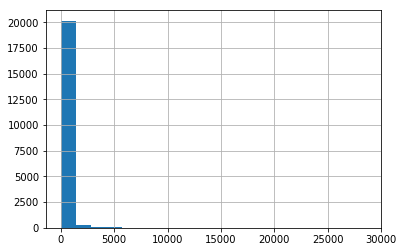

In [70]:
project_weeks = agg_data.groupby([ 
                    'wbsElementId']).agg({'total_hours':'max'})
project_weeks.reset_index(inplace=True)
project_weeks.total_hours.hist(bins=20)

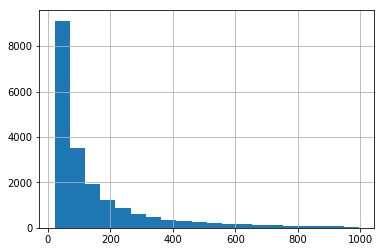

In [71]:
project_weeks = agg_data[agg_data.total_hours < 1000].groupby([ 
                    'wbsElementId']).agg({'total_hours':'max'})
project_weeks.reset_index(inplace=True)
project_weeks.total_hours.hist(bins=20)

In [72]:
agg_data.wbsElementId.nunique()

20586

In [73]:
agg_data[agg_data.diff_homehost == 1].columns

AttributeError: 'DataFrame' object has no attribute 'diff_homehost'

In [74]:
agg_data.columns

Index(['BusinessUnit', 'productCode', 'homeSubLos4', 'homeSubLos4Name',
       'hostSubLos4', 'hostSubLos4Name', 'Engagement_Partner_Id',
       'contracting_firm_client_id', 'localGrade', 'IndustrySector',
       'Industry', 'wbsElementId', 'weekofyear', 'year', 'ChargedHours',
       'wbs_size', 'gradeDesc', 'bucket', 'weekofproj', 'total_hours',
       'compliance'],
      dtype='object')

## New Features:
> hours charged in the past 1/2/3 weeks: week_minus_1 ...

> project stage: done (weekofproj) --> this should be calculated as a % of completion --> **done (project_stage)**

> binary variable to show host/home different or the same **Done (diff_homehost)**

> partner_business_size (aggregate the total hours in the year and do 3-4 buckets) **done**

> client_business_size (similarly, aggregate the total hours in the year and do 3-4 buckets) **done**


In [75]:
def homehost(row):
    if row['homeSubLos4'] != row['hostSubLos4']:
        return 1
    else: 
        return 0

In [76]:
agg_data['diff_homehost'] = agg_data.apply(lambda x: homehost(x), axis=1)

In [77]:
#pd.DataFrame(np.where(agg_data['homeSubLos4'] == agg_data['hostSubLos4'], "Same Home and Host", "Different Home and Host"), columns=['SubLos'])['SubLos'].value_counts().plot(kind='barh')

In [78]:
el_hours = agg_data.groupby([
    'Engagement_Partner_Id']).agg({'ChargedHours':'sum'})
el_hours.reset_index(inplace=True)

In [79]:
el_hours['partner_business_size'] = el_hours['ChargedHours'].transform(lambda x: pd.qcut(x, 4, labels=['small', 'normal', 'large', 'xlarge'], duplicates='drop') if len(x) > 5 else 'normal')

In [80]:
agg_data['partner_business_size'] = agg_data.apply(lambda x: el_hours[el_hours.Engagement_Partner_Id == x.Engagement_Partner_Id].iloc[0]['partner_business_size'], axis=1)

In [81]:
cl_hours = agg_data.groupby([
    'contracting_firm_client_id']).agg({'ChargedHours':'sum'})
cl_hours.reset_index(inplace=True)

In [82]:
cl_hours['client_business_size'] = cl_hours['ChargedHours'].transform(lambda x: pd.qcut(x, 4, labels=['small', 'normal', 'large', 'xlarge'], duplicates='drop') if len(x) > 5 else 'normal')

In [83]:
agg_data['client_business_size'] = agg_data.apply(lambda x: cl_hours[cl_hours.contracting_firm_client_id == x.contracting_firm_client_id].iloc[0]['client_business_size'], axis=1)

In [84]:
wbs_duration = agg_data.groupby([
    'wbsElementId']).agg({'weekofproj':'max'})
wbs_duration.reset_index(inplace=True)

In [85]:
agg_data['project_stage'] = agg_data.apply(lambda x: x.weekofproj/wbs_duration[wbs_duration.wbsElementId == x.wbsElementId].iloc[0]['weekofproj'], axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in long_scalars
  """Entry point for launching an IPython kernel.


In [86]:
agg_data.head()

,BusinessUnit,productCode,homeSubLos4,homeSubLos4Name,hostSubLos4,hostSubLos4Name,Engagement_Partner_Id,contracting_firm_client_id,localGrade,IndustrySector,...,wbs_size,gradeDesc,bucket,weekofproj,total_hours,compliance,diff_homehost,partner_business_size,client_business_size,project_stage
1,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,xlarge,Manager,Manager and Above,11,330.00,1,0,large,xlarge,0.73
2,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,xlarge,Manager,Manager and Above,14,330.00,1,0,large,xlarge,0.93
3,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034646,7000358905,5,Asset and Wealth Management,...,xlarge,Manager,Manager and Above,15,330.00,1,0,large,xlarge,1.00
4,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034701,12637,5,Asset and Wealth Management,...,xlarge,Manager,Manager and Above,0,1304.00,1,0,xlarge,xlarge,0.00
5,AWM,US315,USOU1081,NYM FS - Core,USOU1081,NYM FS - Core,300034701,12637,5,Asset and Wealth Management,...,xlarge,Manager,Manager and Above,1,1304.00,1,0,xlarge,xlarge,0.04


In [87]:
agg_data.columns

Index(['BusinessUnit', 'productCode', 'homeSubLos4', 'homeSubLos4Name',
       'hostSubLos4', 'hostSubLos4Name', 'Engagement_Partner_Id',
       'contracting_firm_client_id', 'localGrade', 'IndustrySector',
       'Industry', 'wbsElementId', 'weekofyear', 'year', 'ChargedHours',
       'wbs_size', 'gradeDesc', 'bucket', 'weekofproj', 'total_hours',
       'compliance', 'diff_homehost', 'partner_business_size',
       'client_business_size', 'project_stage'],
      dtype='object')

In [88]:
agg_data.to_csv('/data/train_data/agg_data_fy19_newfeatures.csv')

### Aggregate by localGrade bucket

In [89]:
bucketed_agg_data = agg_data.groupby(['BusinessUnit',                                                      
                    'productCode', 
                    #'homeSubLos4', 
                    #'hostSubLos4',
                    'Engagement_Partner_Id', 
                    'contracting_firm_client_id',
                    'IndustrySector', 
                    'Industry', 
                    'wbsElementId', 
                    'wbs_size', 
                    'bucket',
                    'weekofproj',
                    'total_hours',
                    'compliance',
                    #'diff_homehost',
                    'partner_business_size',
                    'client_business_size',
                    'project_stage'  ,
                    'weekofyear', 
                    'year', #CG
    ]).agg({'ChargedHours':'sum'})
bucketed_agg_data.reset_index(inplace=True)

In [90]:
print(bucketed_agg_data.shape)
bucketed_agg_data[(bucketed_agg_data.wbsElementId == 476860001) & (bucketed_agg_data.weekofproj == 46)].head()

(498124, 18)


,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,bucket,weekofproj,total_hours,compliance,partner_business_size,client_business_size,project_stage,weekofyear,year,ChargedHours
224824,ITP,US450,300002686,22462,Software & Digital Platforms,"Technology, Media and Telecommunications",476860001,xlarge,Admin,46,621.00,0,xlarge,xlarge,0.90,21,2019,1.00
224828,ITP,US450,300002686,22462,Software & Digital Platforms,"Technology, Media and Telecommunications",476860001,xlarge,Manager and Above,46,621.00,0,xlarge,xlarge,0.90,21,2019,2.00
242330,ITP,US450,300163447,22462,Software & Digital Platforms,"Technology, Media and Telecommunications",476860001,xlarge,Admin,46,621.00,0,large,xlarge,0.90,21,2019,2.00


### Multiple Partners engagements

In [91]:
mult_partner = bucketed_agg_data.groupby(['wbsElementId', 'Engagement_Partner_Id']).size().reset_index().rename(columns={0:'count'})
mult_partner = mult_partner.groupby(['wbsElementId']).size().reset_index().rename(columns={0:'count'})
mult_partner.reset_index(inplace=True)
mult_partner[mult_partner['count'] > 1].head()
mult_wbsElementId = list(mult_partner[mult_partner['count'] > 1].wbsElementId)

In [92]:
with_double_partner = bucketed_agg_data[bucketed_agg_data.wbsElementId.isin(mult_wbsElementId)]
with_double_partner.head()

,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,bucket,weekofproj,total_hours,compliance,partner_business_size,client_business_size,project_stage,weekofyear,year,ChargedHours
438,AWM,US315,300031774,9552,Asset and Wealth Management,Financial Services,1223423001,normal,Admin,2,21.00,1,xlarge,large,0.08,32,2018,1.00
439,AWM,US315,300031774,9552,Asset and Wealth Management,Financial Services,1223423001,normal,Admin,16,21.00,1,xlarge,large,0.67,46,2018,1.00
440,AWM,US315,300031774,9552,Asset and Wealth Management,Financial Services,1223423001,normal,Manager and Above,20,21.00,1,xlarge,large,0.83,50,2018,2.00
441,AWM,US315,300031774,9552,Asset and Wealth Management,Financial Services,1223423001,normal,Manager and Above,21,21.00,1,xlarge,large,0.88,51,2018,1.00
442,AWM,US315,300031774,9552,Asset and Wealth Management,Financial Services,1223423001,normal,Manager and Above,23,21.00,1,xlarge,large,0.96,1,2019,4.00


In [93]:
no_double_partner = bucketed_agg_data[~bucketed_agg_data.wbsElementId.isin(mult_wbsElementId)]

In [94]:
#no_double_partner.reset_index(inplace=True)
#no_double_partner.drop(['index'], axis=1, inplace=True)
no_double_partner.head()

,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,bucket,weekofproj,total_hours,compliance,partner_business_size,client_business_size,project_stage,weekofyear,year,ChargedHours
0,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Admin,0,21.00,1,large,normal,0.00,38,2018,1.00
1,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Admin,4,21.00,1,large,normal,0.21,42,2018,1.00
2,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,13,21.00,1,large,normal,0.68,51,2018,1.00
3,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,17,21.00,1,large,normal,0.89,3,2019,1.00
4,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,19,21.00,1,large,normal,1.00,5,2019,4.00


In [95]:
no_double_partner[(no_double_partner.wbsElementId == 723144001) & (no_double_partner.weekofproj == 3)]

,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,bucket,weekofproj,total_hours,compliance,partner_business_size,client_business_size,project_stage,weekofyear,year,ChargedHours
116062,BCMI,US396,300002210,5492,Insurance,Financial Services,723144001,xlarge,Admin,3,116.00,1,large,normal,0.06,31,2018,1.00
116065,BCMI,US396,300002210,5492,Insurance,Financial Services,723144001,xlarge,Manager and Above,3,116.00,1,large,normal,0.06,31,2018,1.00
335579,PCS,US396,300002210,5492,Insurance,Financial Services,723144001,xlarge,Admin,3,116.00,1,large,normal,0.06,31,2018,1.00
335602,PCS,US396,300002210,5492,Insurance,Financial Services,723144001,xlarge,Manager and Above,3,116.00,1,large,normal,0.06,31,2018,1.00


## Multiple BUs

In [96]:
mult_bu = no_double_partner.groupby(['wbsElementId', 'BusinessUnit']).size().reset_index().rename(columns={0:'count'})
mult_bu = mult_bu.groupby(['wbsElementId']).size().reset_index().rename(columns={0:'count'})
mult_bu.reset_index(inplace=True)
display(mult_bu[mult_bu['count'] > 1].shape)
mult_bu_wbsElementId = list(mult_bu[mult_bu['count'] > 1].wbsElementId)

(584, 3)

In [98]:
#CG
no_doubles = no_double_partner

In [99]:
wbs_duration = no_doubles.groupby([
    'wbsElementId']).agg({'weekofproj':'max'})
wbs_duration.reset_index(inplace=True)
wbs_duration.head()

,wbsElementId,weekofproj
0,155691001,29
1,191691001,50
2,192121001,30
3,192421001,48
4,219437001,49


In [100]:
no_doubles['total_weeks'] = no_doubles.apply(lambda x: wbs_duration[wbs_duration.wbsElementId == x.wbsElementId].iloc[0]['weekofproj'], axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [3]:
no_doubles = pd.read_csv('/data/train_data/agg_data_fy19_newfeatures_nodoubles.csv')

In [101]:
no_doubles.head()

,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,bucket,weekofproj,total_hours,compliance,partner_business_size,client_business_size,project_stage,weekofyear,year,ChargedHours,total_weeks
0,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Admin,0,21.00,1,large,normal,0.00,38,2018,1.00,19
1,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Admin,4,21.00,1,large,normal,0.21,42,2018,1.00,19
2,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,13,21.00,1,large,normal,0.68,51,2018,1.00,19
3,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,17,21.00,1,large,normal,0.89,3,2019,1.00,19
4,AWM,US315,300000632,145157,Asset and Wealth Management,Financial Services,1230318001,normal,Manager and Above,19,21.00,1,large,normal,1.00,5,2019,4.00,19


In [102]:
no_doubles = no_double_partner[~no_double_partner.wbsElementId.isin(mult_bu_wbsElementId)]

In [103]:
no_doubles.describe()

,Engagement_Partner_Id,contracting_firm_client_id,wbsElementId,weekofproj,total_hours,compliance,project_stage,weekofyear,year,ChargedHours,total_weeks
count,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00,452148.00
mean,299875097.09,1861343193.56,1632519946.80,14.22,461.93,0.71,0.48,25.07,2018.53,9.42,29.91
std,7162228.65,3109152298.62,5239443104.79,11.47,1124.50,0.45,0.31,14.64,0.50,23.90,12.62
min,100707245.00,12.00,155691001.00,0.00,21.00,0.00,0.00,1.00,2018.00,1.00,1.00
25%,300084485.00,13638.00,1236845001.00,5.00,73.00,0.00,0.21,12.00,2018.00,1.00,20.00
50%,300141284.00,55646.00,1283454001.00,12.00,175.00,1.00,0.46,25.00,2019.00,3.00,30.00
75%,300166441.00,7000218317.00,1369500001.00,21.00,441.00,1.00,0.74,38.00,2019.00,8.00,40.00
max,300352504.00,7300025810.00,80120726001.00,51.00,28535.00,1.00,1.00,52.00,2019.00,1535.00,51.00


In [104]:
full_raw_data = no_doubles.groupby(['BusinessUnit',                                                      
                    'productCode', 
                    'Engagement_Partner_Id', 
                    'contracting_firm_client_id',
                    'IndustrySector', 
                    'Industry', 
                    'wbsElementId', 
                    'wbs_size', 
                    'weekofproj',
                    'total_hours',
                    'compliance',
                    'partner_business_size',
                    'client_business_size',
                    'project_stage',
                    'total_weeks',
                    'weekofyear',
                    'year'
    ]).agg({'ChargedHours':'sum'})
full_raw_data.reset_index(inplace=True)

In [105]:
manager_raw_data = no_doubles[no_doubles.bucket == 'Manager and Above']

In [106]:
manager_raw_data.shape

(202746, 19)

In [107]:
admin_raw_data = no_doubles[no_doubles.bucket == 'Admin']

In [108]:
admin_raw_data.ChargedHours.sum()/no_doubles.ChargedHours.sum()

0.06199630090194289

In [109]:
staff_raw_data = no_doubles[no_doubles.bucket == 'Staff & Senior']

### Before calculating the "previous weeks" we need to fill the week gaps

In [110]:
weeks_w_data = manager_raw_data.groupby(['wbsElementId', 'weekofproj'])[['wbsElementId', 'weekofproj']].size().reset_index().rename(columns={0:'count'})
weeks_w_data.reset_index(inplace=True)
weeks_w_data[weeks_w_data['count'] > 1].head()
#weeks_w_data.head()

,index,wbsElementId,weekofproj,count


In [111]:
list(range(0,2+1))

[0, 1, 2]

In [16]:
"""
gaps_dfs = []
for wbs in manager_raw_data.wbsElementId.unique():
    weeks = list(range(0,manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0]['total_weeks']+1))
    iterables = [weeks]
    this_wbs = manager_raw_data[manager_raw_data.wbsElementId == wbs]
    this_wbs = this_wbs.set_index(['weekofproj'])
    this_wbs = this_wbs.reindex(index=pd.MultiIndex.from_product(iterables, names=['weekofproj']), fill_value=0).reset_index()
    gaps_dfs.append(this_wbs)
all_gaps = pd.concat(gaps_dfs)
"""

"\ngaps_dfs = []\nfor wbs in manager_raw_data.wbsElementId.unique():\n    weeks = list(range(0,manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0]['total_weeks']+1))\n    iterables = [weeks]\n    this_wbs = manager_raw_data[manager_raw_data.wbsElementId == wbs]\n    this_wbs = this_wbs.set_index(['weekofproj'])\n    this_wbs = this_wbs.reindex(index=pd.MultiIndex.from_product(iterables, names=['weekofproj']), fill_value=0).reset_index()\n    gaps_dfs.append(this_wbs)\nall_gaps = pd.concat(gaps_dfs)\n"

In [17]:
#all_gaps.head()#[(all_gaps.bucket == 'Manager and Above') & (all_gaps.wbsElementId ==  87706001)]

In [112]:
step = 1
gaps_dfs = []
for wbs in tqdm(full_raw_data.wbsElementId.unique()):
    # delta between weekofproject and weekofyear
    deltaofweek = full_raw_data[full_raw_data.wbsElementId == wbs].iloc[0]['weekofyear'] - full_raw_data[full_raw_data.wbsElementId == wbs].iloc[0]['weekofproj']
    
    idx = list(range(0, full_raw_data[full_raw_data.wbsElementId == wbs].iloc[0]['total_weeks'] + 1))
    col_to_fill = [x for x in full_raw_data.columns if x not in ['ChargedHours','project_stage','weekofproj', 'weekofyear']]        
    filler = full_raw_data[full_raw_data.wbsElementId == wbs].iloc[0][col_to_fill].to_dict() #CG filling of the year may not be right
    this_wbs = full_raw_data[full_raw_data.wbsElementId == wbs].set_index(['weekofproj']).reindex(idx).reset_index()
    this_wbs.fillna(filler, axis=0, inplace = True)
    this_wbs.fillna({'ChargedHours':0}, axis=0, inplace = True)
    this_wbs['project_stage'] = this_wbs.apply(lambda x: x.weekofproj/x.total_weeks, axis = 1)
    this_wbs['weekofyear'] = this_wbs.apply(lambda x: x.weekofproj + deltaofweek - 52 if x.weekofproj + deltaofweek > 52 else x.weekofproj + deltaofweek, axis=1)
    gaps_dfs.append(this_wbs)

full_filled_raw_data = pd.concat(gaps_dfs)

100%|██████████| 18920/18920 [05:35<00:00, 56.36it/s]


In [118]:
full_filled_raw_data.head(10)

,weekofproj,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,total_hours,compliance,partner_business_size,client_business_size,project_stage,total_weeks,weekofyear,year,ChargedHours
0,0,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.00,19.00,38,2018.00,1.00
1,1,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.05,19.00,39,2018.00,0.00
2,2,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.11,19.00,40,2018.00,0.00
3,3,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.16,19.00,41,2018.00,0.00
4,4,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.21,19.00,42,2018.00,1.00
5,5,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.26,19.00,43,2018.00,0.00
6,6,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.32,19.00,44,2018.00,0.00
7,7,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.37,19.00,45,2018.00,0.00
8,8,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.42,19.00,46,2018.00,0.00
9,9,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,21.00,1.00,large,normal,0.47,19.00,47,2018.00,0.00


In [117]:
step = 1
gaps_dfs = []
for wbs in tqdm(manager_raw_data.wbsElementId.unique()):
    # delta between weekofproject and weekofyear
    deltaofweek = manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0]['weekofyear'] - manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0]['weekofproj']
    
    idx = list(range(0, manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0]['total_weeks'] + 1))
    col_to_fill = [x for x in manager_raw_data.columns if x not in ['ChargedHours','project_stage','weekofproj', 'weekofyear']]        
    filler = manager_raw_data[manager_raw_data.wbsElementId == wbs].iloc[0][col_to_fill].to_dict() #CG filling of the year may not be right
    this_wbs = manager_raw_data[manager_raw_data.wbsElementId == wbs].set_index(['weekofproj']).reindex(idx).reset_index()
    this_wbs.fillna(filler, axis=0, inplace = True)
    this_wbs.fillna({'ChargedHours':0}, axis=0, inplace = True)
    this_wbs['project_stage'] = this_wbs.apply(lambda x: x.weekofproj/x.total_weeks, axis = 1)
    this_wbs['weekofyear'] = this_wbs.apply(lambda x: x.weekofproj + deltaofweek - 52 if x.weekofproj + deltaofweek > 52 else x.weekofproj + deltaofweek, axis=1)
    gaps_dfs.append(this_wbs)

manager_filled_raw_data = pd.concat(gaps_dfs)

100%|██████████| 18416/18416 [05:30<00:00, 55.73it/s]


In [119]:
step = 1
gaps_dfs = []
for wbs in tqdm(staff_raw_data.wbsElementId.unique()):
    # delta between weekofproject and weekofyear
    deltaofweek = staff_raw_data[staff_raw_data.wbsElementId == wbs].iloc[0]['weekofyear'] - staff_raw_data[staff_raw_data.wbsElementId == wbs].iloc[0]['weekofproj']
    
    idx = list(range(0, staff_raw_data[staff_raw_data.wbsElementId == wbs].iloc[0]['total_weeks'] + 1))
    col_to_fill = [x for x in staff_raw_data.columns if x not in ['ChargedHours','project_stage','weekofproj', 'weekofyear']]        
    filler = staff_raw_data[staff_raw_data.wbsElementId == wbs].iloc[0][col_to_fill].to_dict() #CG filling of the year may not be right
    this_wbs = staff_raw_data[staff_raw_data.wbsElementId == wbs].set_index(['weekofproj']).reindex(idx).reset_index()
    this_wbs.fillna(filler, axis=0, inplace = True)
    this_wbs.fillna({'ChargedHours':0}, axis=0, inplace = True)
    this_wbs['project_stage'] = this_wbs.apply(lambda x: x.weekofproj/x.total_weeks, axis = 1)
    this_wbs['weekofyear'] = this_wbs.apply(lambda x: x.weekofproj + deltaofweek - 52 if x.weekofproj + deltaofweek > 52 else x.weekofproj + deltaofweek, axis=1)
    gaps_dfs.append(this_wbs)

staff_filled_raw_data = pd.concat(gaps_dfs)

100%|██████████| 18116/18116 [05:22<00:00, 56.15it/s]


In [120]:
step = 1
gaps_dfs = []
for wbs in tqdm(admin_raw_data.wbsElementId.unique()):
    # delta between weekofproject and weekofyear
    deltaofweek = admin_raw_data[admin_raw_data.wbsElementId == wbs].iloc[0]['weekofyear'] - admin_raw_data[admin_raw_data.wbsElementId == wbs].iloc[0]['weekofproj']
    
    idx = list(range(0, admin_raw_data[admin_raw_data.wbsElementId == wbs].iloc[0]['total_weeks'] + 1))
    col_to_fill = [x for x in admin_raw_data.columns if x not in ['ChargedHours','project_stage','weekofproj', 'weekofyear']]        
    filler = admin_raw_data[admin_raw_data.wbsElementId == wbs].iloc[0][col_to_fill].to_dict() #CG filling of the year may not be right
    this_wbs = admin_raw_data[admin_raw_data.wbsElementId == wbs].set_index(['weekofproj']).reindex(idx).reset_index()
    this_wbs.fillna(filler, axis=0, inplace = True)
    this_wbs.fillna({'ChargedHours':0}, axis=0, inplace = True)
    this_wbs['project_stage'] = this_wbs.apply(lambda x: x.weekofproj/x.total_weeks, axis = 1)
    this_wbs['weekofyear'] = this_wbs.apply(lambda x: x.weekofproj + deltaofweek - 52 if x.weekofproj + deltaofweek > 52 else x.weekofproj + deltaofweek, axis=1)
    gaps_dfs.append(this_wbs)

admin_filled_raw_data = pd.concat(gaps_dfs)

100%|██████████| 12374/12374 [03:38<00:00, 56.68it/s]


In [121]:
manager_filled_raw_data.columns

Index(['weekofproj', 'BusinessUnit', 'productCode', 'Engagement_Partner_Id',
       'contracting_firm_client_id', 'IndustrySector', 'Industry',
       'wbsElementId', 'wbs_size', 'bucket', 'total_hours', 'compliance',
       'partner_business_size', 'client_business_size', 'project_stage',
       'weekofyear', 'year', 'ChargedHours', 'total_weeks'],
      dtype='object')

In [66]:
#print(staff_filled_raw_data.shape)
#staff_filled_raw_data[staff_filled_raw_data.wbsElementId == 1230318001]

In [88]:
#weeks_w_data[(weeks_w_data.wbsElementId == 87706001) & (weeks_w_data.bucket == 'Admin')].head(20)

In [113]:
full_filled_raw_data.to_csv('/data/train_data/fy19_full_filled_raw_data0225.csv')
manager_filled_raw_data.to_csv('/data/train_data/fy19_manager_filled_raw_data0225.csv')
admin_filled_raw_data.to_csv('/data/train_data/fy19_admin_filled_raw_data0225.csv')
staff_filled_raw_data.to_csv('/data/train_data/fy19_staff_filled_raw_data0225.csv')

staff_filled_raw_data = pd.read_csv('/data/train_data/fy19_staff_filled_raw_data.csv')
manager_filled_raw_data = pd.read_csv('/data/train_data/fy19_manager_filled_raw_data.csv')
admin_filled_raw_data = pd.read_csv('/data/train_data/fy19_admin_filled_raw_data.csv')
full_filled_raw_data = pd.read_csv('/data/train_data/fy19_full_filled_raw_data.csv')

In [122]:
#CG: adding biweekly features
staff_filled_raw_data['biweekofyear'] = staff_filled_raw_data['weekofyear']//2 + 1 
manager_filled_raw_data['biweekofyear'] = manager_filled_raw_data['weekofyear']//2 + 1 
admin_filled_raw_data['biweekofyear'] = admin_filled_raw_data['weekofyear']//2 + 1 
full_filled_raw_data['biweekofyear'] = full_filled_raw_data['weekofyear']//2 + 1 

staff_filled_raw_data['biweekofproj'] = staff_filled_raw_data['weekofproj']//2 + 1 
manager_filled_raw_data['biweekofproj'] = manager_filled_raw_data['weekofproj']//2 + 1 
admin_filled_raw_data['biweekofproj'] = admin_filled_raw_data['weekofproj']//2 + 1 
full_filled_raw_data['biweekofproj'] = full_filled_raw_data['weekofproj']//2 + 1 

#group data to generate biweekly records
group_col_list = ['BusinessUnit',                                                      
                    'productCode', 
                    'Engagement_Partner_Id', 
                    'contracting_firm_client_id',
                    'IndustrySector', 
                    'Industry', 
                    'wbsElementId', 
                    'wbs_size', 
                    'biweekofproj',
                    'total_hours',
                    'compliance',
                    'partner_business_size',
                    'client_business_size',
                    'project_stage',
                    'total_weeks',
                    'biweekofyear',
                    'year'
    ]

In [123]:
staff_biw_filled_raw_data = staff_filled_raw_data.groupby(group_col_list).agg({'ChargedHours':'sum'})
staff_biw_filled_raw_data.reset_index(inplace=True)

manager_biw_filled_raw_data = manager_filled_raw_data.groupby(group_col_list).agg({'ChargedHours':'sum'})
manager_biw_filled_raw_data.reset_index(inplace=True)

admin_biw_filled_raw_data = admin_filled_raw_data.groupby(group_col_list).agg({'ChargedHours':'sum'})
admin_biw_filled_raw_data.reset_index(inplace=True)

full_biw_filled_raw_data = full_filled_raw_data.groupby(group_col_list).agg({'ChargedHours':'sum'})
full_biw_filled_raw_data.reset_index(inplace=True)

In [126]:
def previous_biweeks(row, df, weeks = 1):
    if row.biweekofproj - weeks < 0:
        return 0
    else:
        return int(df[(df.wbsElementId == row.wbsElementId) & (df.contracting_firm_client_id == row.contracting_firm_client_id)
            & (df.Engagement_Partner_Id == row.Engagement_Partner_Id)
            & (df.biweekofproj == (row.biweekofproj - weeks))]['ChargedHours'])

def add_previous_biweeks(df):
    df['biweek_minus_1'] = df.apply(lambda x: previous_biweeks(x, df, weeks = 1), axis=1)
    df['biweek_minus_2'] = df.apply(lambda x: previous_biweeks(x, df, weeks = 2), axis=1)
    #df['week_minus_3'] = df.apply(lambda x: previous_weeks(x, df, weeks = 3), axis=1)

In [127]:
add_previous_biweeks(full_filled_raw_data)
print('full done')
add_previous_biweeks(manager_filled_raw_data)
print('manager done')
add_previous_biweeks(staff_filled_raw_data)
print('staff done')
add_previous_biweeks(admin_filled_raw_data)
print('admin done')


TypeError: ("cannot convert the series to <class 'int'>", 'occurred at index 0')

In [34]:
def previous_weeks(row, df, weeks = 1):
    if row.weekofproj - weeks < 0:
        return 0
    else:
        return int(df[(df.wbsElementId == row.wbsElementId) & (df.contracting_firm_client_id == row.contracting_firm_client_id)
            & (df.Engagement_Partner_Id == row.Engagement_Partner_Id)
            & (df.weekofproj == (row.weekofproj - weeks))]['ChargedHours'])

In [35]:
def add_previous_weeks(df):
    df['week_minus_1'] = df.apply(lambda x: previous_weeks(x, df, weeks = 1), axis=1)
    df['week_minus_2'] = df.apply(lambda x: previous_weeks(x, df, weeks = 2), axis=1)
    df['week_minus_3'] = df.apply(lambda x: previous_weeks(x, df, weeks = 3), axis=1)

In [69]:
add_previous_weeks(full_filled_raw_data)

In [46]:
def growth_rate1(row):
    if row.week_minus_1 == 0:
        return 0
    elif row.week_minus_2 == 0:
        return 1
    else:
        return (row.week_minus_1 - row.week_minus_2) / (row.week_minus_2)
    
def growth_rate2(row):
    if row.week_minus_2 == 0:
        return 0
    elif row.week_minus_3 == 0:
        return 1
    else:
        return (row.week_minus_2 - row.week_minus_3) / (row.week_minus_3)

In [47]:
def add_growth_rates(df):
    df['growth_rate_1'] = df.apply(lambda x: growth_rate1(x), axis = 1)
    df['growth_rate_2'] = df.apply(lambda x: growth_rate2(x), axis = 1)

In [70]:
add_growth_rates(full_filled_raw_data)

In [49]:
add_growth_rates(staff_filled_raw_data)

In [50]:
add_growth_rates(admin_filled_raw_data)

In [52]:
manager_filled_raw_data.head(100)

,weekofproj,Unnamed: 0,BusinessUnit,productCode,Engagement_Partner_Id,contracting_firm_client_id,IndustrySector,Industry,wbsElementId,wbs_size,...,partner_business_size,client_business_size,project_stage,ChargedHours,total_weeks,week_minus_1,week_minus_2,week_minus_3,growth_rate_1,growth_rate_2
0,0,2.00,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,...,large,normal,0.00,0.00,19.00,0,0,0,0.00,0.00
1,1,2.00,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,...,large,normal,0.05,0.00,19.00,0,0,0,0.00,0.00
2,2,2.00,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,...,large,normal,0.11,0.00,19.00,0,0,0,0.00,0.00
3,3,2.00,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,...,large,normal,0.16,0.00,19.00,0,0,0,0.00,0.00
4,4,2.00,AWM,US315,300000632.00,145157.00,Asset and Wealth Management,Financial Services,1230318001.00,normal,...,large,normal,0.21,0.00,19.00,0,0,0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,13,58.00,AWM,US315,300000632.00,7300005080.00,Asset and Wealth Management,Financial Services,1378227001.00,large,...,large,xlarge,0.81,0.00,16.00,1,1,3,0.00,-0.67
14,14,68.00,AWM,US315,300000632.00,7300005080.00,Asset and Wealth Management,Financial Services,1378227001.00,large,...,large,xlarge,0.88,2.00,16.00,0,1,1,0.00,0.00
15,15,69.00,AWM,US315,300000632.00,7300005080.00,Asset and Wealth Management,Financial Services,1378227001.00,large,...,large,xlarge,0.94,1.00,16.00,2,0,1,1.00,0.00
16,16,70.00,AWM,US315,300000632.00,7300005080.00,Asset and Wealth Management,Financial Services,1378227001.00,large,...,large,xlarge,1.00,3.00,16.00,1,2,0,-0.50,1.00


In [73]:
all_dfs = {'staff':staff_filled_raw_data, 'manager': manager_filled_raw_data, 'admin':admin_filled_raw_data}

In [ ]:
def add_grade_features(name, name_from, df, df_from):
    

In [82]:
""" NOT OPTIMIZED - USE BELOW INSTEAD """
def cross_grade_features(dfs):
    for name in dfs.keys():
        for name_from in [x for x in list(dfs.keys()) if x is not name]:
            print(name, name_from)
            dfs[name][name_from + '_week_minus_1'] = dfs[name].apply(lambda x: dfs[name_from][(dfs[name_from].weekofproj == x.weekofproj) & (dfs[name_from].wbsElementId == x.wbsElementId)].iloc[0]['week_minus_1'] if x.wbsElementId in dfs[name_from].wbsElementId.unique() else 0, axis=1)
            dfs[name][name_from + '_week_minus_2'] = dfs[name].apply(lambda x: dfs[name_from][(dfs[name_from].weekofproj == x.weekofproj) & (dfs[name_from].wbsElementId == x.wbsElementId)].iloc[0]['week_minus_2'] if x.wbsElementId in dfs[name_from].wbsElementId.unique() else 0, axis=1)
            dfs[name][name_from + '_week_minus_3'] = dfs[name].apply(lambda x: dfs[name_from][(dfs[name_from].weekofproj == x.weekofproj) & (dfs[name_from].wbsElementId == x.wbsElementId)].iloc[0]['week_minus_3'] if x.wbsElementId in dfs[name_from].wbsElementId.unique() else 0, axis=1)

In [84]:
#cross_grade_features(dfs)

In [ ]:
full_biw_filled_raw_data.to_csv('/data/train_data/fy19_full_biw_filled_raw_data0225.csv')
manager_biw_filled_raw_data.to_csv('/data/train_data/fy19_manager_biw_filled_raw_data0225.csv')
admin_biw_filled_raw_data.to_csv('/data/train_data/fy19_admin_biw_filled_raw_data0225.csv')
staff_biw_filled_raw_data.to_csv('/data/train_data/fy19_staff_biw_filled_raw_data0225.csv')

In [110]:
merging_with = 'admin'
columns = list(staff_filled_raw_data.columns) + ['week_minus_1_' + merging_with,'week_minus_2_' + merging_with,'week_minus_3_' + merging_with]

In [111]:
out = staff_filled_raw_data.merge(admin_filled_raw_data, on=['wbsElementId', 'weekofproj'], suffixes=('','_admin'), how='left')

In [112]:
staff_filled_raw_data = out[columns]

In [125]:
staff_filled_raw_data.to_csv('/data/train_data/fy19_staff_filled_raw_data.csv')

In [121]:
staff_filled_raw_data.fillna(0, inplace=True)
manager_filled_raw_data.fillna(0, inplace=True)
admin_filled_raw_data.fillna(0, inplace=True)

/home/jovyan/.conda/envs/tf/lib/python3.6/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [122]:
staff_filled_raw_data.isnull().sum()

Unnamed: 0                    0
weekofproj                    0
Unnamed: 0.1                  0
BusinessUnit                  0
productCode                   0
Engagement_Partner_Id         0
contracting_firm_client_id    0
IndustrySector                0
Industry                      0
wbsElementId                  0
wbs_size                      0
bucket                        0
total_hours                   0
compliance                    0
partner_business_size         0
client_business_size          0
project_stage                 0
ChargedHours                  0
total_weeks                   0
week_minus_1                  0
week_minus_2                  0
week_minus_3                  0
growth_rate_1                 0
growth_rate_2                 0
week_minus_1_manager          0
week_minus_2_manager          0
week_minus_3_manager          0
week_minus_1_admin            0
week_minus_2_admin            0
week_minus_3_admin            0
dtype: int64